In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import array, arange, zeros, dot, log
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [5]:
prandtl = 10
rho = 28
beta = 8/3
dt = 0.01
num_steps = 10000

In [9]:
def catergorize_lyapunov(lya1, lya2, lya3):
    if lya1 < 0:
        return "stable fixed point"
    elif lya1 == 0:
        if lya2 < 0:
            return "stable limit cycle"
        elif lya2 == 0:
            return "stable 2D tori"
    else:
        return "chaotic strange attractor"

def lorenz_attr(x, y, z):
    x_dot = prandtl*(y - x)
    y_dot = rho*x - y - x*z
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot



xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)
xs[0], ys[0], zs[0] = (0., 1., 1.05)


/var/folders/gx/mbhhwt6160z52kd_nkkqjtcr0000gn/T/ipykernel_3341/4210416375.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0.92, 'Lorenz Attractor')

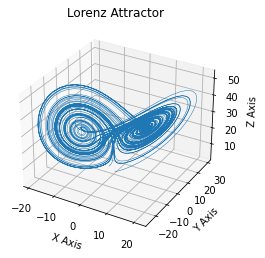

In [7]:
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz_attr(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

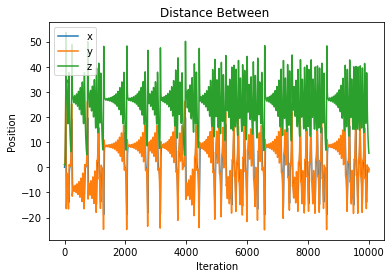

In [8]:
it_nums = list(range(0, num_steps+1))

plt.plot(it_nums, xs, label = "x")
plt.plot(it_nums, ys, label = "y")
plt.plot(it_nums, zs, label = "z")

# naming the x axis
plt.xlabel('Iteration')
# naming the y axis
plt.ylabel('Position')
# giving a title to my graph
plt.title('Distance Between ')
 

# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

In [14]:

# Evolution equation of tracjectories and tangential vectors
def f(r):
    x = r[0]
    y = r[1]
    z = r[2]

    fx = prandtl * (y - x)
    fy = x * (rho - z) - y
    fz = x * y - beta * z

    return array([fx,fy,fz], float)

def jacobian(r):
    M = zeros([3,3])
    M[0,:] = [- prandtl, prandtl, 0]
    M[1,:] = [rho - r[2], -1, - r[0] ]
    M[2,:] = [r[1], r[0], -beta]

    return M

def g(d, r):
    dx = d[0]
    dy = d[1]
    dz = d[2]

    M = jacobian(r)

    dfx = dot(M, dx)
    dfy = dot(M, dy)
    dfz = dot(M, dz)

    return array([dfx, dfy, dfz], float)

# Initial conditions
d = array([[1,0,0], [0,1,0], [0,0,1]], float)
r = array([19.0, 20.0, 50.0], float)

T  = 10**5                         # time steps 
dt = 0.01                          # time increment
Teq = 10**4                        # Transient time

l1, l2, l3 = 0, 0, 0               # Lengths

xpoints, ypoints, zpoints  = [], [], []

# Transient
for t in range(Teq):
    # RK4 - Method 
    k1  = dt * f(r)                 
    k11 = dt * g(d, r)

    k2  = dt * f(r + 0.5 * k1)
    k22 = dt * g(d + 0.5 * k11, r + 0.5 * k1)

    k3  = dt * f(r + 0.5 * k2)
    k33 = dt * g(d + 0.5 * k22, r + 0.5 * k2)

    k4  = dt * f(r + k3)
    k44 = dt * g(d + k33, r + k3)

    r  += (k1  + 2 * k2  + 2 * k3  + k4)  / 6
    d  += (k11 + 2 * k22 + 2 * k33 + k44) / 6

    # Gram-Schmidt-Scheme
    orth_1 = d[0]                    
    d[0] = orth_1 / norm(orth_1)

    orth_2 = d[1] - dot(d[1], d[0]) * d[0]
    d[1] = orth_2 / norm(orth_2)

    orth_3 = d[2] - (dot(d[2], d[1]) * d[1]) - (dot(d[2], d[0]) * d[0]) 
    d[2] = orth_3 / norm(orth_3)

for t in range(T):
    k1  = dt * f(r)                 
    k11 = dt * g(d, r)

    k2  = dt * f(r + 0.5 * k1)
    k22 = dt * g(d + 0.5 * k11, r + 0.5 * k1)

    k3  = dt * f(r + 0.5 * k2)
    k33 = dt * g(d + 0.5 * k22, r + 0.5 * k2)

    k4  = dt * f(r + k3)
    k44 = dt * g(d + k33, r + k3)

    r  += (k1  + 2 * k2  + 2 * k3  + k4)  / 6
    d  += (k11 + 2 * k22 + 2 * k33 + k44) / 6

    orth_1 = d[0]                    # Gram-Schmidt-Scheme
    l1 += log(norm(orth_1))
    d[0] = orth_1 / norm(orth_1)

    orth_2 = d[1] - dot(d[1], d[0]) * d[0]
    l2 += log(norm(orth_2))
    d[1] = orth_2 / norm(orth_2)

    orth_3 = d[2] - (dot(d[2], d[1]) * d[1]) - (dot(d[2], d[0]) * d[0]) 
    l3 += log(norm(orth_3))
    d[2] = orth_3 / norm(orth_3)

# Correct Solution (2.16, 0.0, -32.4)

lya1 = l1 / (dt * T)
lya2 = l2 / (dt * T)  - lya1
lya3 = l3 / (dt * T) -  lya1 - lya2 

print(lya1, lya2, lya3)
print(catergorize_lyapunov(lya1, lya2, lya3))

0.8982633643624799 -0.8973498114445203 -14.566655483482283
chaotic strange attractor


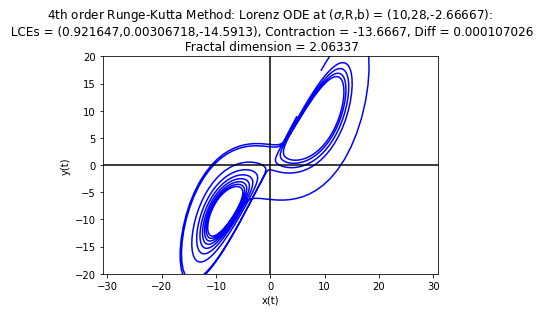

In [16]:
# LorenzODELCE.py:
#   Estimate the spectrum of Lyapunov Characteristic Exponents
#	  for the Lorenz ODEs, using the pull-back method.
#   Also, estimate the volume-contraction (dissipation) rate and the
#	   fractal dimenion (latter using the Kaplan-Yorke conjecture).
#   Plot out trajectory, for reference.
#
# Comment:
#	Notice how much more complicated the code has become, given
#		that we're writing out variables in component form.
#   This should be rewritten to use vectors, which will be
#	   much more compact and easier to debug. Equally important,
#      the code would generalize to any dimension system.

# Import plotting routines
from pylab import *


# The Lorenz 3D ODEs
#	Original parameter values: (sigma,R,b) = (10,28,-8/3)
def LorenzXDot(sigma,R,b,x,y,z):
	return sigma * (-x + y)

def LorenzYDot(sigma,R,b,x,y,z):
	return R*x - x*z - y

def LorenzZDot(sigma,R,b,x,y,z):
	return b*z + x*y

# The tangent space (linearized) flow (aka co-tangent flow)
def LorenzDXDot(sigma,R,b,x,y,z,dx,dy,dz):
	return sigma * (-dx + dy)

def LorenzDYDot(sigma,R,b,x,y,z,dx,dy,dz):
	return (R-z)*dx - dy - x*dz

def LorenzDZDot(sigma,R,b,x,y,z,dx,dy,dz):
	return y*dx + x*dy + b*dz

# Volume contraction given by
#	 Trace(Jacobian(x,y,z)) = b - sigma - 1
def LorenzODETrJac(sigma,R,b,x,y,z):
	return b - sigma - 1
# As a check, we must have total contraction = Sum of LCEs
#	 Tr(J) = Sum_i LCEi
# Numerical check: at (sigma,R,b) = (10,28,-8/3)
#	 LCE0  ~   0.9058
#	 LCE1  ~   0.0000
#	 LCE2  ~ -14.572
#	 Tr(J) ~ -13.6666
# These use base-2 logs

# The fractal dimension from the LCEs (Kaplan-Yorke conjecture)
#   Assume these are ordered: LCE1 >= LCE2 >= LCE3
def FractalDimension3DODE(LCE1,LCE2,LCE3):
	# "Close" to zero ... we're estimating here
	Err = 0.01
	if LCE1 < -Err:	  # Stable fixed point    (-,-,-)
		return 0.0
	elif abs(LCE1) <= Err:
		if LCE2 < -Err:  # Limit cycle	      (0,-,-)
			return 1.0
		else:	        # Torus               (0,0,-)
			return 2.0
	else:	            # Chaotic attractor   (+,0,-)
		return 2.0 + (LCE1+LCE2) / abs(LCE3)

# 3D fourth-order Runge-Kutta integrator
def RKThreeD(a,b,c,x,y,z,f,g,h,dt):
	k1x = dt * f(a,b,c,x,y,z)
	k1y = dt * g(a,b,c,x,y,z)
	k1z = dt * h(a,b,c,x,y,z)
	k2x = dt * f(a,b,c,x + k1x / 2.0,y + k1y / 2.0,z + k1z / 2.0)
	k2y = dt * g(a,b,c,x + k1x / 2.0,y + k1y / 2.0,z + k1z / 2.0)
	k2z = dt * h(a,b,c,x + k1x / 2.0,y + k1y / 2.0,z + k1z / 2.0)
	k3x = dt * f(a,b,c,x + k2x / 2.0,y + k2y / 2.0,z + k2z / 2.0)
	k3y = dt * g(a,b,c,x + k2x / 2.0,y + k2y / 2.0,z + k2z / 2.0)
	k3z = dt * h(a,b,c,x + k2x / 2.0,y + k2y / 2.0,z + k2z / 2.0)
	k4x = dt * f(a,b,c,x + k3x,y + k3y,z + k3z)
	k4y = dt * g(a,b,c,x + k3x,y + k3y,z + k3z)
	k4z = dt * h(a,b,c,x + k3x,y + k3y,z + k3z)
	x += ( k1x + 2.0 * k2x + 2.0 * k3x + k4x ) / 6.0
	y += ( k1y + 2.0 * k2y + 2.0 * k3y + k4y ) / 6.0
	z += ( k1z + 2.0 * k2z + 2.0 * k3z + k4z ) / 6.0
	return x,y,z

# Tanget space flow (using fourth-order Runge-Kutta integrator)
def TangentFlowRKThreeD(a,b,c,x,y,z,df,dg,dh,dx,dy,dz,dt):
	k1x = dt * df(a,b,c,x,y,z,dx,dy,dz)
	k1y = dt * dg(a,b,c,x,y,z,dx,dy,dz)
	k1z = dt * dh(a,b,c,x,y,z,dx,dy,dz)
	k2x = dt * df(a,b,c,x,y,z,dx+k1x/2.0,dy+k1y/2.0,dz+k1z/2.0)
	k2y = dt * dg(a,b,c,x,y,z,dx+k1x/2.0,dy+k1y/2.0,dz+k1z/2.0)
	k2z = dt * dh(a,b,c,x,y,z,dx+k1x/2.0,dy+k1y/2.0,dz+k1z/2.0)
	k3x = dt * df(a,b,c,x,y,z,dx+k2x/2.0,dy+k2y/2.0,dz+k2z/2.0)
	k3y = dt * dg(a,b,c,x,y,z,dx+k2x/2.0,dy+k2y/2.0,dz+k2z/2.0)
	k3z = dt * dh(a,b,c,x,y,z,dx+k2x/2.0,dy+k2y/2.0,dz+k2z/2.0)
	k4x = dt * df(a,b,c,x,y,z,dx+k3x,dy+k3y,dz+k3z)
	k4y = dt * dg(a,b,c,x,y,z,dx+k3x,dy+k3y,dz+k3z)
	k4z = dt * dh(a,b,c,x,y,z,dx+k3x,dy+k3y,dz+k3z)
	dx += ( k1x + 2.0 * k2x + 2.0 * k3x + k4x ) / 6.0
	dy += ( k1y + 2.0 * k2y + 2.0 * k3y + k4y ) / 6.0
	dz += ( k1z + 2.0 * k2z + 2.0 * k3z + k4z ) / 6.0
	return dx,dy,dz

# Simulation parameters
# Integration time step
dt = 0.01
#
# Control parameters for the Lorenz ODEs:
sigma = 10.0
R	  = 28.0
b	  = -8.0/3.0
# The number of iterations to throw away
nTransients = 10
# The number of time steps to integrate over
nIterates = 1000

# The main loop that generates the orbit, storing the states
xState = 5.0
yState = 5.0
zState = 5.0
# Iterate for some number of transients, but don't use these states
for n in range(0,nTransients):
	xState,yState,zState = RKThreeD(sigma,R,b,xState,yState,zState,LorenzXDot,LorenzYDot,LorenzZDot,dt)
# Set up array of iterates and store the current state
x = [xState]
y = [yState]
z = [zState]
for n in range(0,nIterates):
	# at each time step calculate new (x,y,z)(t)
	xt,yt,zt = RKThreeD(sigma,R,b,x[n],y[n],z[n],LorenzXDot,LorenzYDot,LorenzZDot,dt)
	# and append to lists
	x.append(xt)
	y.append(yt)
	z.append(zt)

# Estimate the LCEs
# The number of iterations to throw away
nTransients = 100
# The number of iterations to over which to estimate
#  This is really the number of pull-backs
nIterates = 1000
# The number of iterations per pull-back
nItsPerPB = 10
# Initial condition
xState = 5.0
yState = 5.0 
zState = 5.0 
# Initial tangent vectors
e1x = 1.0
e1y = 0.0
e1z = 0.0
e2x = 0.0
e2y = 1.0
e2z = 0.0
e3x = 0.0
e3y = 0.0
e3z = 1.0
# Iterate away transients and let the tangent vectors align
#	with the global stable and unstable manifolds
for n in range(0,nTransients):
	for i in range(nItsPerPB):
		xState,yState,zState = RKThreeD(sigma,R,b,xState,yState,zState,\
			LorenzXDot,LorenzYDot,LorenzZDot,dt)
		# Evolve tangent vector for maximum LCE (LCE1)
		e1x,e1y,e1z = TangentFlowRKThreeD(sigma,R,b,xState,yState,zState,\
			LorenzDXDot,LorenzDYDot,LorenzDZDot,e1x,e1y,e1z,dt)
		# Evolve tangent vector for next LCE (LCE2)
		e2x,e2y,e2z = TangentFlowRKThreeD(sigma,R,b,xState,yState,zState,\
			LorenzDXDot,LorenzDYDot,LorenzDZDot,e2x,e2y,e2z,dt)
		# Evolve tangent vector for last LCE
		e3x,e3y,e3z = TangentFlowRKThreeD(sigma,R,b,xState,yState,zState,\
			LorenzDXDot,LorenzDYDot,LorenzDZDot,e3x,e3y,e3z,dt)
	# Normalize the tangent vector
	d = sqrt(e1x*e1x + e1y*e1y + e1z*e1z)
	e1x /= d
	e1y /= d
	e1z /= d
	# Pull-back: Remove any e1 component from e2
	dote1e2 = e1x * e2x + e1y * e2y + e1z * e2z
	e2x -= dote1e2 * e1x
	e2y -= dote1e2 * e1y
	e2z -= dote1e2 * e1z
	# Normalize second tangent vector
	d = sqrt(e2x*e2x + e2y*e2y + e2z*e2z)
	e2x /= d
	e2y /= d
	e2z /= d
	# Pull-back: Remove any e1 and e2 components from e3
	dote1e3 = e1x * e3x + e1y * e3y + e1z * e3z
	dote2e3 = e2x * e3x + e2y * e3y + e2z * e3z
	e3x -= dote1e3 * e1x + dote2e3 * e2x
	e3y -= dote1e3 * e1y + dote2e3 * e2y
	e3z -= dote1e3 * e1z + dote2e3 * e2z
	# Normalize third tangent vector
	d = sqrt(e3x*e3x + e3y*e3y + e3z*e3z)
	e3x /= d
	e3y /= d
	e3z /= d

# Okay, now we're ready to begin the estimation
LCE1 = 0.0
LCE2 = 0.0
LCE3 = 0.0
for n in range(0,nIterates):
	for i in range(nItsPerPB):
		xState,yState,zState = RKThreeD(sigma,R,b,xState,yState,zState,\
			LorenzXDot,LorenzYDot,LorenzZDot,dt)
		# Evolve tangent vector for maximum LCE (LCE1)
		e1x,e1y,e1z = TangentFlowRKThreeD(sigma,R,b,xState,yState,zState,\
			LorenzDXDot,LorenzDYDot,LorenzDZDot,e1x,e1y,e1z,dt)
		# Evolve tangent vector for next LCE (LCE2)
		e2x,e2y,e2z = TangentFlowRKThreeD(sigma,R,b,xState,yState,zState,\
			LorenzDXDot,LorenzDYDot,LorenzDZDot,e2x,e2y,e2z,dt)
		# Evolve tangent vector for last LCE
		e3x,e3y,e3z = TangentFlowRKThreeD(sigma,R,b,xState,yState,zState,\
			LorenzDXDot,LorenzDYDot,LorenzDZDot,e3x,e3y,e3z,dt)
	# Normalize the tangent vector
	d = sqrt(e1x*e1x + e1y*e1y + e1z*e1z)
	e1x /= d
	e1y /= d
	e1z /= d
	# Accumulate the first tangent vector's length change factor
	LCE1 += log(d)
	# Pull-back: Remove any e1 component from e2
	dote1e2 = e1x * e2x + e1y * e2y + e1z * e2z
	e2x -= dote1e2 * e1x
	e2y -= dote1e2 * e1y
	e2z -= dote1e2 * e1z
	# Normalize second tangent vector
	d = sqrt(e2x*e2x + e2y*e2y + e2z*e2z)
	e2x /= d
	e2y /= d
	e2z /= d
	# Accumulate the second tangent vector's length change factor
	LCE2 += log(d)
	# Pull-back: Remove any e1 and e2 components from e3
	dote1e3 = e1x * e3x + e1y * e3y + e1z * e3z
	dote2e3 = e2x * e3x + e2y * e3y + e2z * e3z
	e3x -= dote1e3 * e1x + dote2e3 * e2x
	e3y -= dote1e3 * e1y + dote2e3 * e2y
	e3z -= dote1e3 * e1z + dote2e3 * e2z
	# Normalize third tangent vector
	d = sqrt(e3x*e3x + e3y*e3y + e3z*e3z)
	e3x /= d
	e3y /= d
	e3z /= d
	# Accumulate the third tangent vector's length change factor
	LCE3 += log(d)

# Convert to per-iterate, per-second LCEs and to base-2 logs
IntegrationTime = dt * float(nItsPerPB) * float(nIterates)
LCE1 = LCE1 / IntegrationTime
LCE2 = LCE2 / IntegrationTime
LCE3 = LCE3 / IntegrationTime
# Calculate contraction factor, for comparison.
#	For Lorenz ODE, we know this is independent of (x,y,z).
#	Otherwise, we'd have to estimate it along the trajectory, too.
Contraction = LorenzODETrJac(sigma,R,b,0.0,0.0,0.0)

# Choose a pair of coordinates from (x,y,z) to show
# Setup the parametric plot:
xlabel('x(t)') # set x-axis label
ylabel('y(t)') # set y-axis label
# Construct plot title
LCEString = '(%g,%g,%g)' % (LCE1,LCE2,LCE3)
PString = '($\sigma$,R,b) = (%g,%g,%g)' % (sigma,R,b)
CString = 'Contraction = %g, Diff = %g' % (Contraction,abs(LCE1+LCE2+LCE3-Contraction))
FString   = 'Fractal dimension = %g' % FractalDimension3DODE(LCE1,LCE2,LCE3)
title('4th order Runge-Kutta Method: Lorenz ODE at ' + PString + ':\n LCEs = ' + LCEString + ', ' + CString + '\n ' + FString)
axis('equal')
axis([-20.0,20.0,-20.0,20.0])
# Plot the trajectory in the phase plane
plot(x,y,'b')
axhline(0.0,color = 'k')
axvline(0.0,color = 'k')

# Use command below to save figure
#savefig('LorenzODELCE', dpi=600)

# Display the plot in a window
show()